# Captstone 3: Portuguese Bank Marketing

### Lisa Patel

#### Summary:

The data is related with direct marketing campaigns of a Portuguese banking institution, based on phone calls (Moro, Cortez, and Rita 2014).Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

The goal of the campaigns were to get the clients to subscribe to a term deposit. There are 19 input variables and 1 binary output variable (y) that indicates whether the client subscribed to a term deposit with values ‘yes’,‘no’. The input variables can be divided into four categories:

 - bank client data
 - data related to last contact of current campaign
 - social and economic context attributes
 - other
 
Bank client data contains variables containing information about the client. It includes variables indicating age, job, marital status, education, whether they have credit in default, whether they have a housing loan, whether they have a personal loan.

Data related to the last contact of the current campaign contain variables indicating the mode of communication, month of last communication, day of week when the last contact was made and the last call duration.

Social and economic context attributes contain variables with the quarterly employment variation rate, monthly consumer price index, monthly consumer confidence index, number of employees and the euribor 3 month rate.

Other attributes include number of previous contacts with the client during the current campaign, number of days since the last contact for the previous campaign, number of contacts performed before the current campaign for the client and the outcome of the previous marketing campaign.

#### The goal of the project is to classify with high accuracy whether the campaign will be successful or not given a set of input variables and understand what the profile of the individual that does or does not subscribe to a term deposit. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE


In [2]:
train = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
print(train.shape)
train.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

## Input variables:

#### Client data: 
1. age: (numeric)
2.  job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### Last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day: last contact day of the month (numerical)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Social and economic context attributes
12. emp.var.rate: employment variation rate - quarterly indicator (numeric)
13. cons.price.idx: consumer price index - monthly indicator (numeric) 
14. cons.conf.idx: consumer confidence index,  measures how optimistic or pessimistic consumers are regarding their expected financial situation - monthly indicator (numeric)
15. euribor3m: euribor 3 month rate, the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months - daily indicator (numeric)
16. nr.employed: number of employees - quarterly indicator (numeric)

#### Other:
17. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
18. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
19. previous: number of contacts performed before this campaign and for this client (numeric)
20. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Output variable:
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [5]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#No missing data
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### EDA

In [7]:
train.rename(columns = {'y':'Deposit?'}, inplace = True)

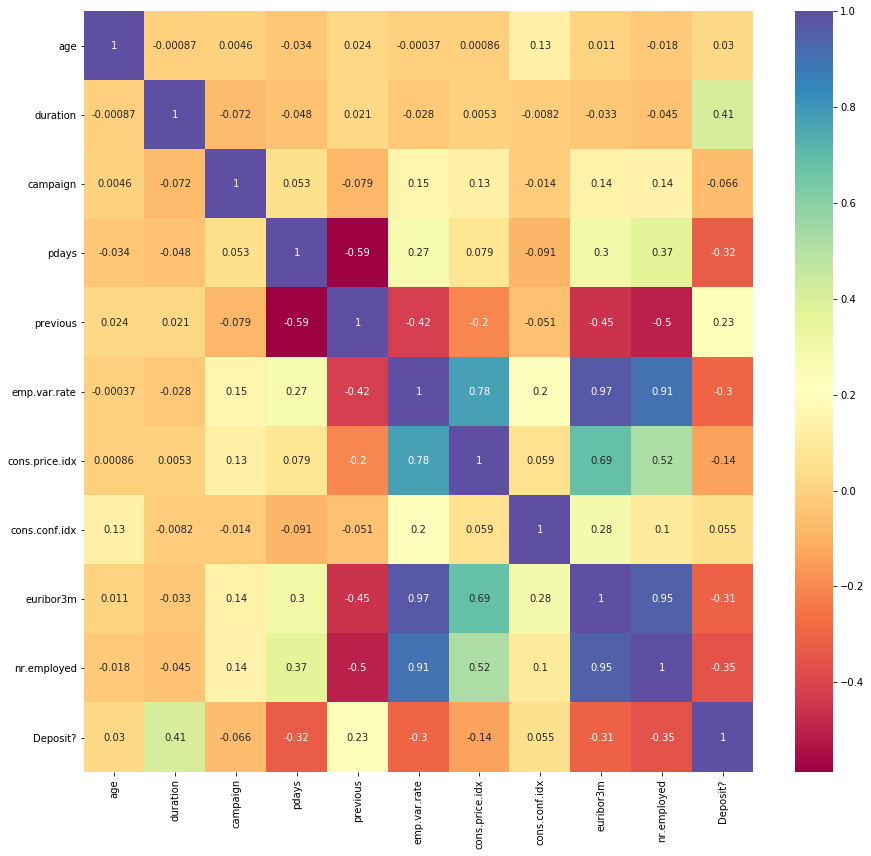

In [8]:
#Term Deposit Subscription (Target). Tranforming Yes = 1 / No = 0
train['Deposit?'] = 1 * (train['Deposit?']== 'yes')
plt.figure(figsize=(15, 14))
sns.heatmap(train.corr(), annot=True, cmap='Spectral')
plt.show()

Heatmap shows most correlation with social & economic context attributes. 

(+): emp.var.rate  & nr.employed, cons.price.idx & eurobor3m/nr.employed,  euribor3m & nr.employed, cons.price.idx & nr.employed. 

(-): emp.var.rate & previous, pdays & previous

Target variable shows positive correlation with euribor.3m and previous and negative  one with nr.employed, emp.var.rate and pdays. 


In [9]:
#Dropping duration given the note in the description
train.drop("duration", inplace=True, axis=1)

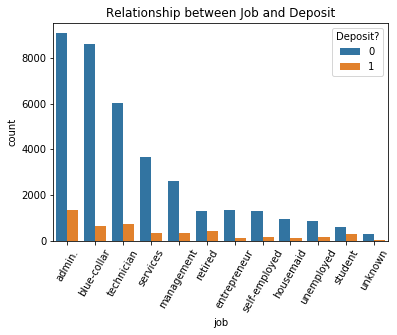

In [10]:
job = sns.countplot(x="job", data = train, hue = "Deposit?", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between Job and Deposit")
plt.show()

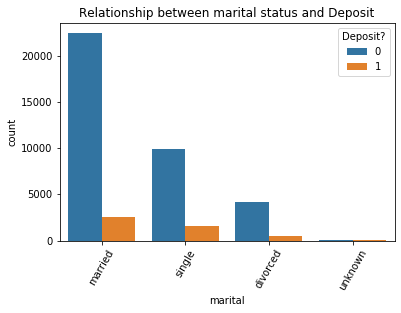

In [11]:
marital = sns.countplot(x="marital", data = train, hue = "Deposit?", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("Relationship between marital status and Deposit")
plt.show()

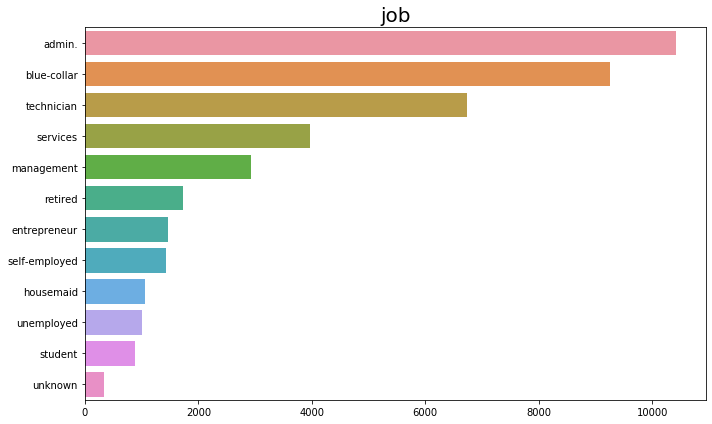

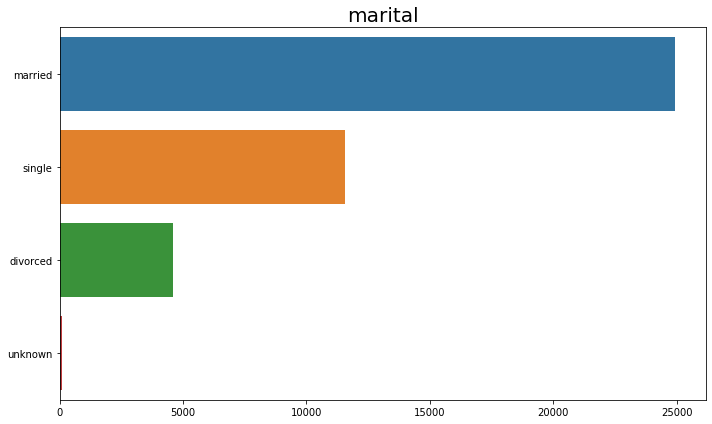

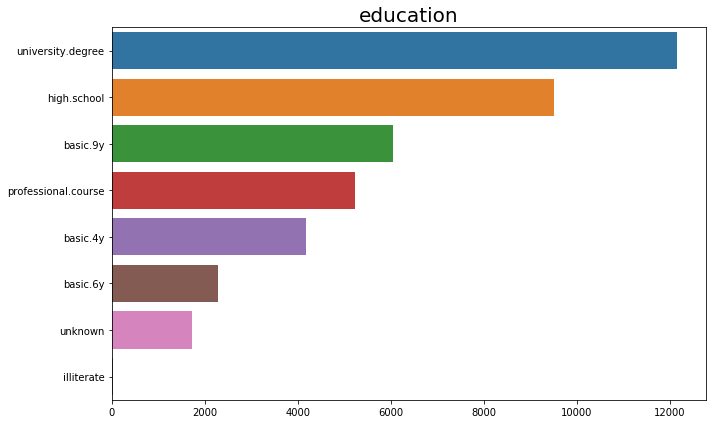

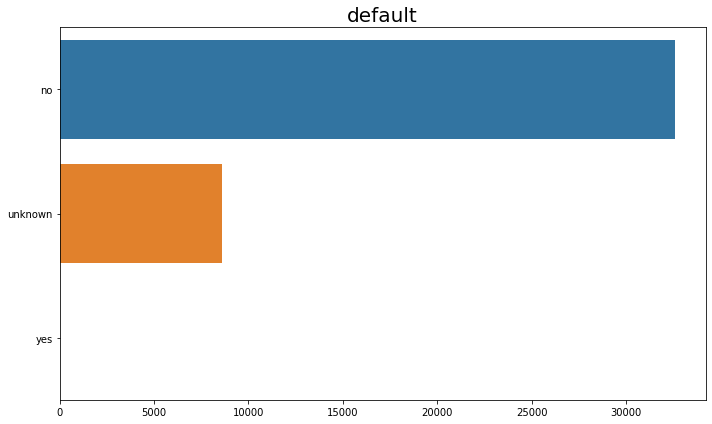

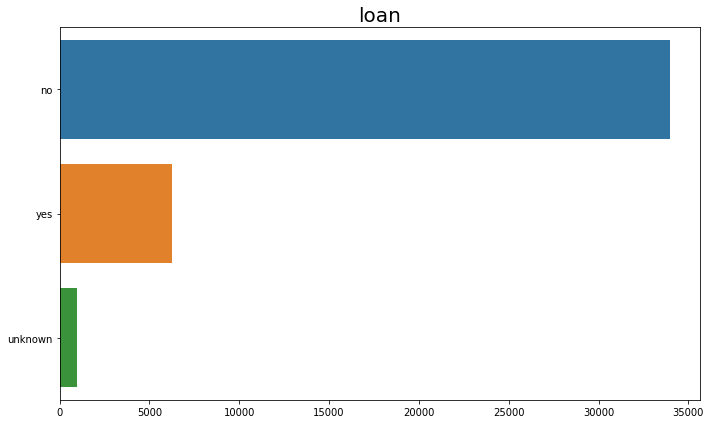

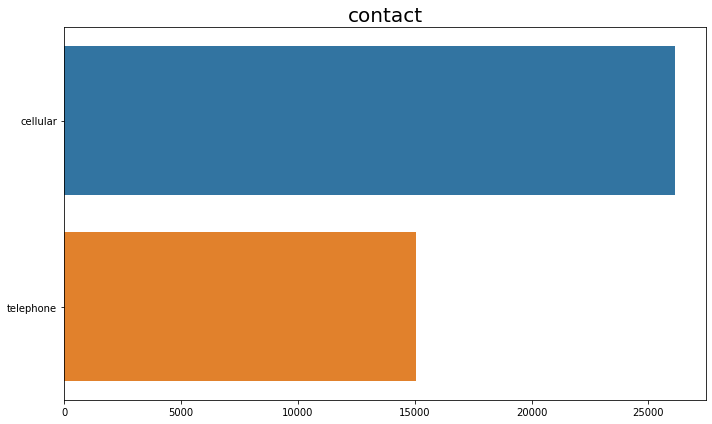

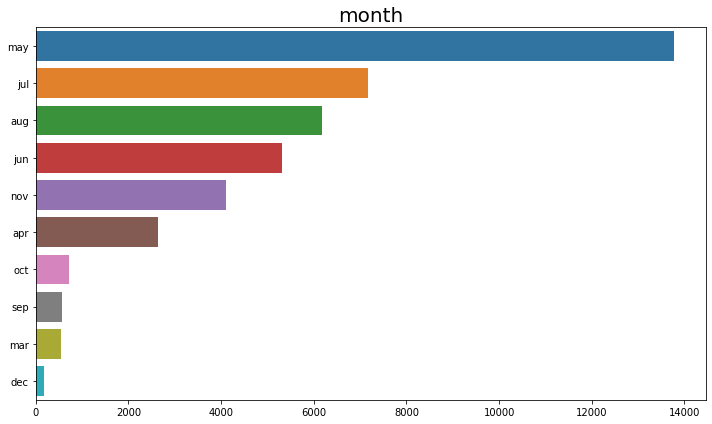

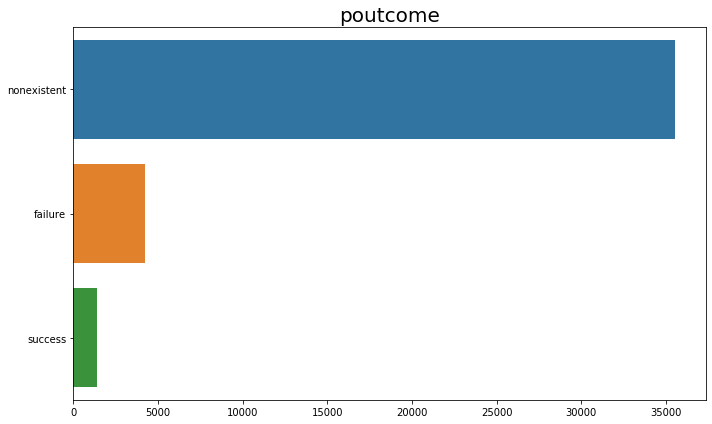

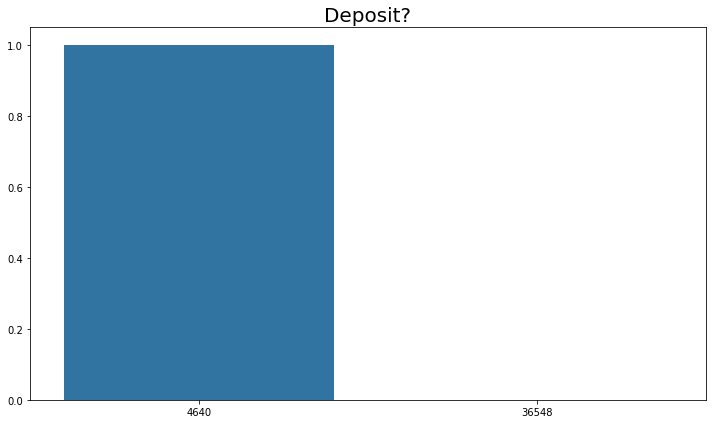

In [12]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome','Deposit?']
for col in categorical_variables:
    plt.figure(figsize=(10,6))
    sns.barplot(train[col].value_counts().values, train[col].value_counts().index)
    plt.title(col, fontsize = 20)
    plt.tight_layout()
plt.show()

Job


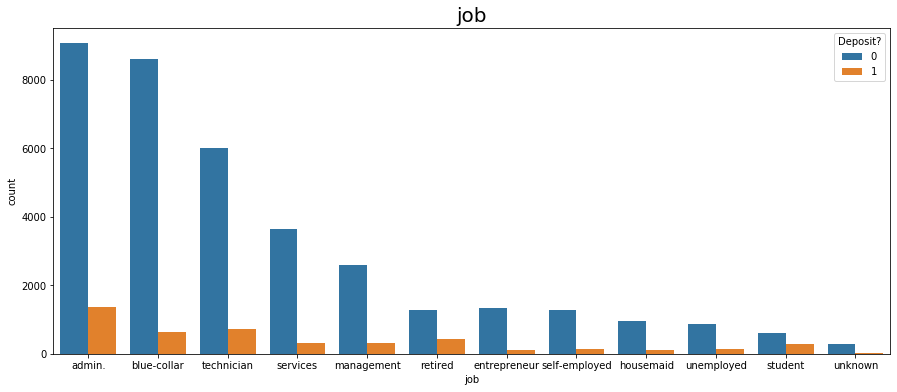

Marital


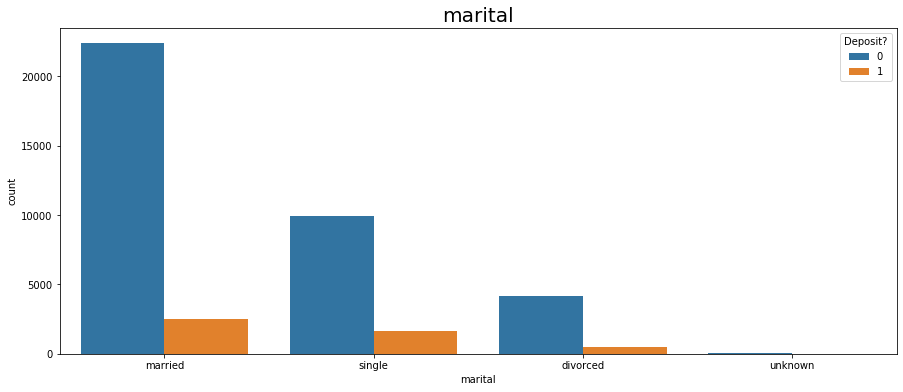

Education


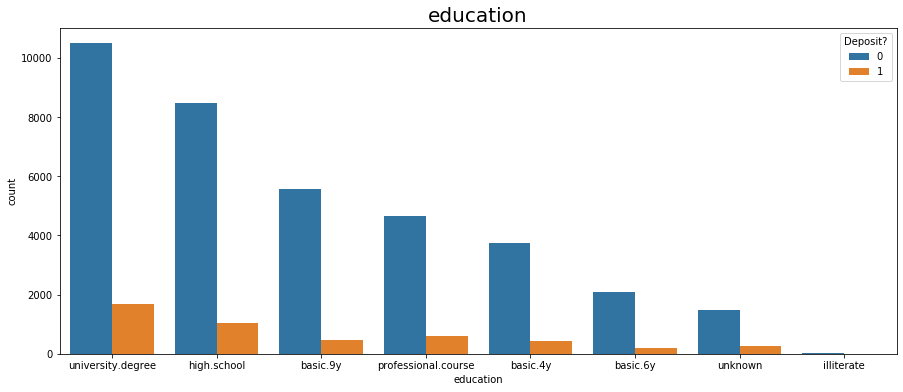

Default


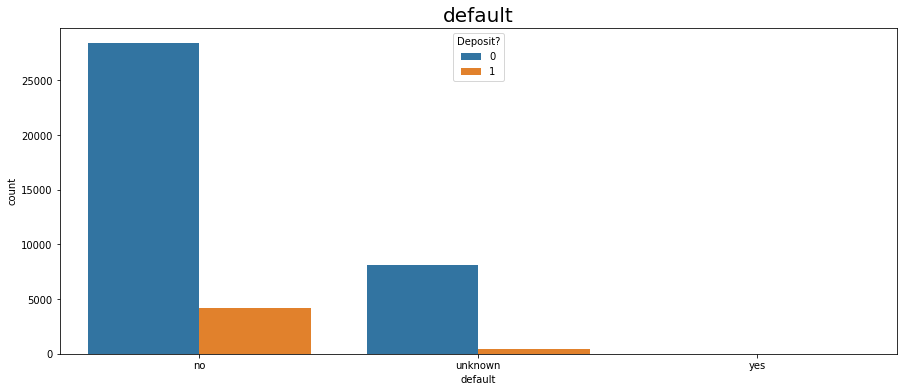

Loan


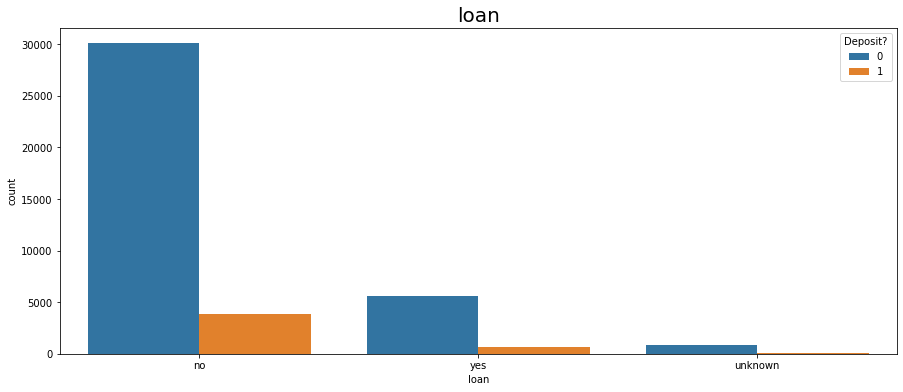

Contact


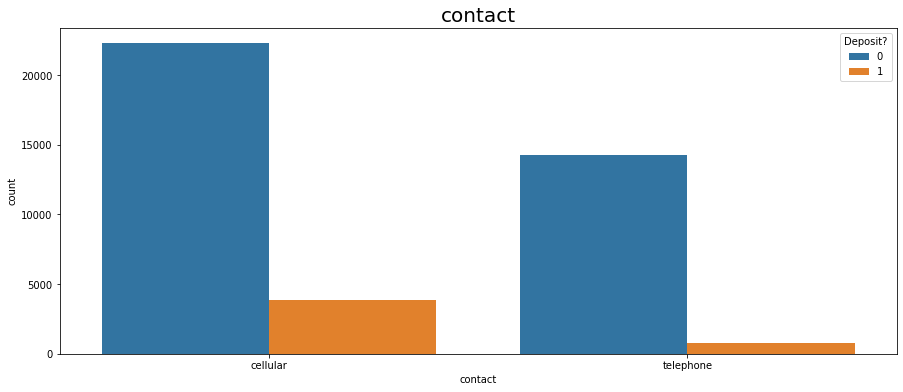

Month


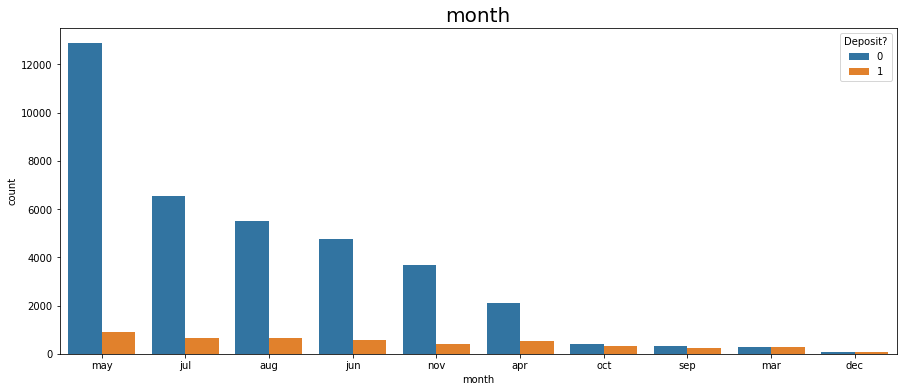

Poutcome


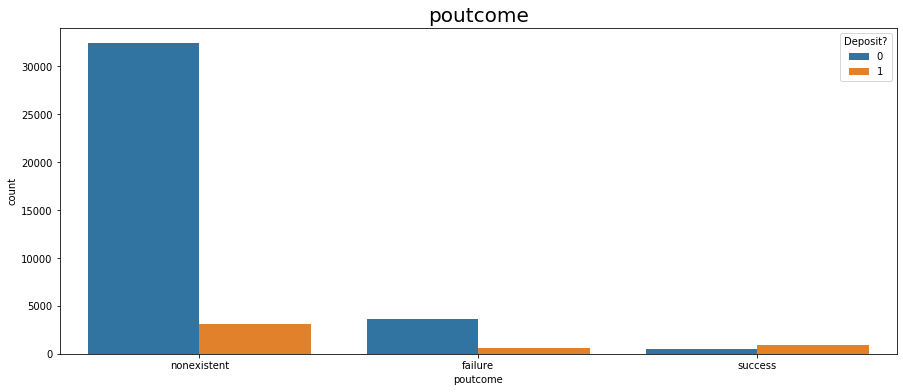

Deposit?


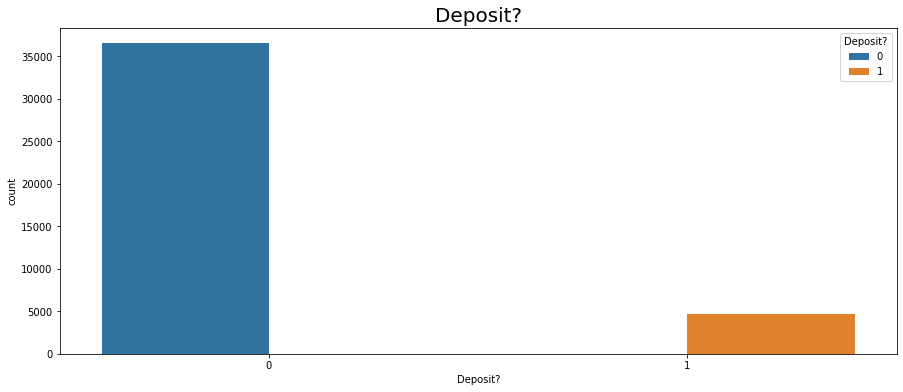

In [13]:
for columns in categorical_variables:
    plt.figure(figsize=(15,6))
    print(columns.title())
    sns.countplot(x = train[columns], data = train, hue='Deposit?', order = train[columns].value_counts().index)
    plt.title(columns, fontsize = 20)
    plt.show()

### Observations:

1.  Blue collar and admin workers were the most prevalent and most likely to subscribe with students, housemaids, unemployed and entrepreneur having least likelihood. 

2. Married and Single individuals had similar numbers of subscriptions

3. Not suprisingly, those with university degrees were more likely to subscribe.

4. Most people who were contacted did not have a loan and thus were more able to subscribe

5. Most contacted via cellular.

6. May was signifanctly the busiest month for deposits and december is least.

7. Drastically unbalanced data set with only ~5k being yes compared to ~35k saying no a subscription. Various techiniques, like oversampling, undersampling, SMOTE, will have to be used to adjust for this.                


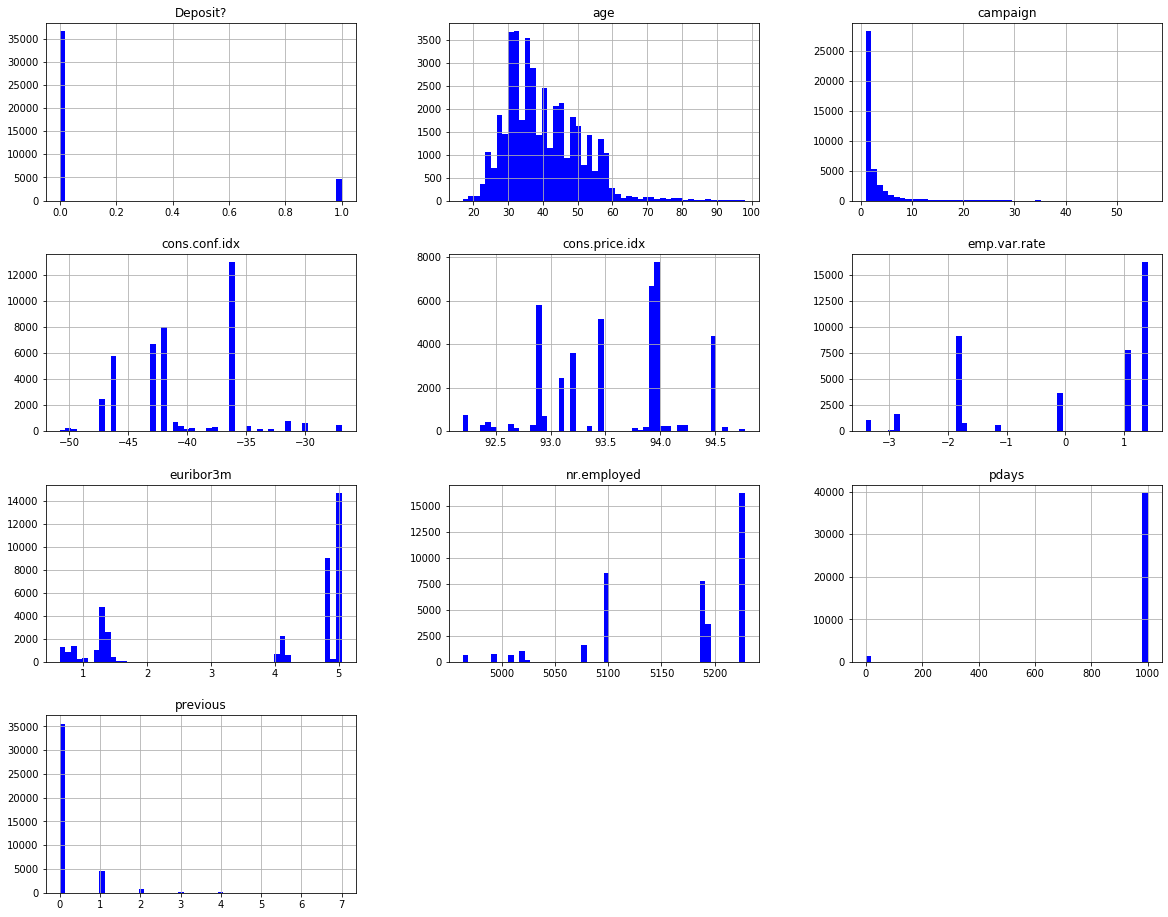

In [14]:
#to check the distribution of columns
train.hist(bins = 50, figsize=(20,16), color = 'blue') 
plt.show()

According to the decription of the pdays, 999 corresponds to the client not being contacted. Given that the majority are 999, it makes sense to drop it and maybe 'previous' as a column.


In [15]:
train.drop("pdays", inplace=True, axis=1)
train.drop("previous", inplace=True, axis=1)

## Age Distribution

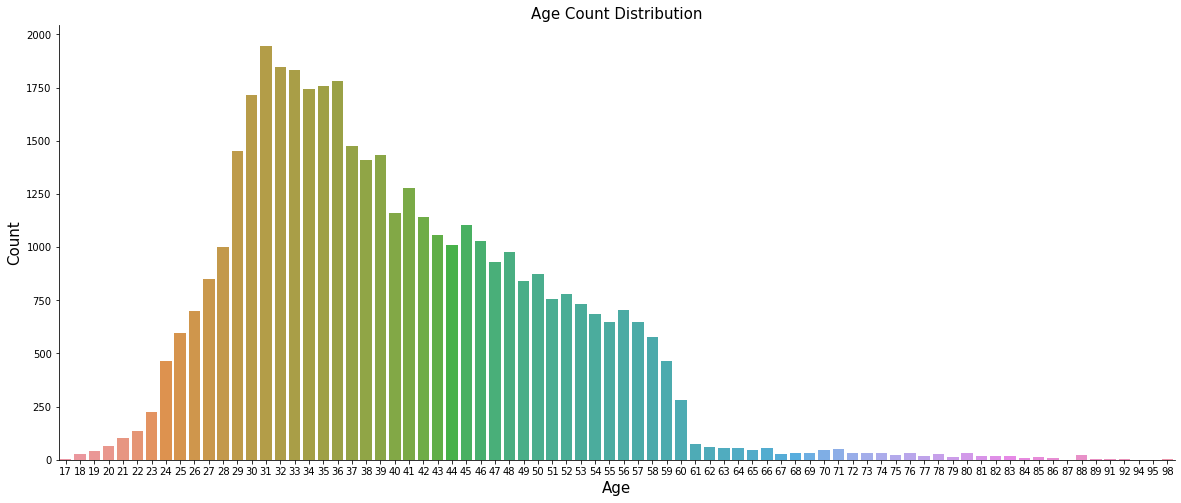

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [17]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(train);

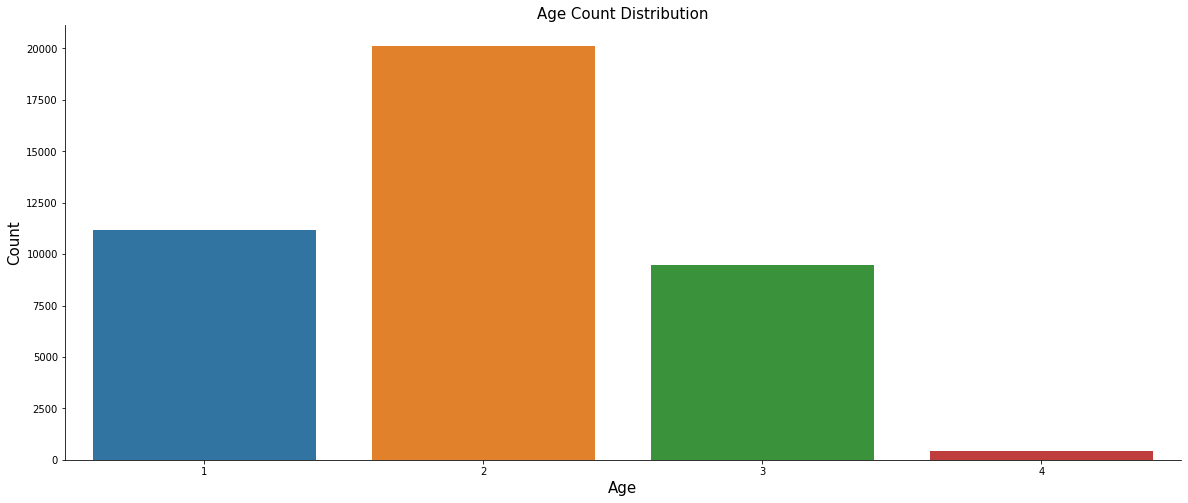

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = train)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

Text(0.5, 1.0, 'Count of Calls made on Days of the Week')

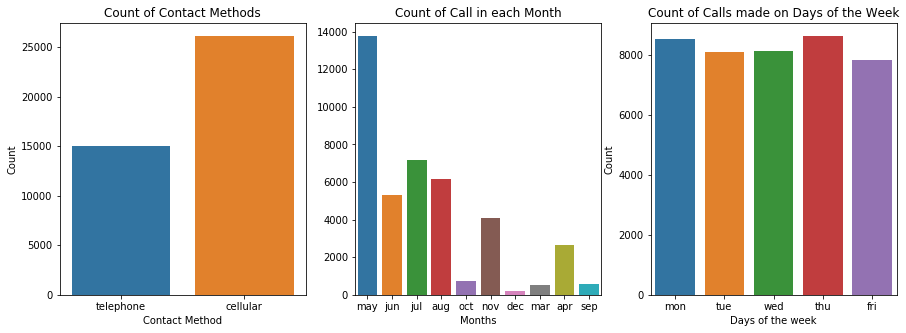

In [19]:
# For contact and Days of the week
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

sns.countplot(x = 'contact', data = train, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(train['month'], ax = ax2)
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Count of Call in each Month')
ax2.tick_params(labelsize=10)

sns.countplot(train['day_of_week'], ax = ax3)
ax3.set_xlabel("Days of the week")
ax3.set_ylabel("Count")
ax3.set_title("Count of Calls made on Days of the Week")

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0        3    housemaid  married             basic.4y       no      no   no   
1        3     services  married          high.school  unknown      no   no   
2        2     services  married          high.school       no     yes   no   
3        2       admin.  married             basic.6y       no      no   no   
4        3     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183    4      retired  married  professional.course       no     yes   no   
41184    2  blue-collar  married  professional.course       no      no   no   
41185    3      retired  married    university.degree       no     yes   no   
41186    2   technician  married  professional.course       no      no   no   
41187    4      retired  married  professional.course       no     yes   no   

         contact mont

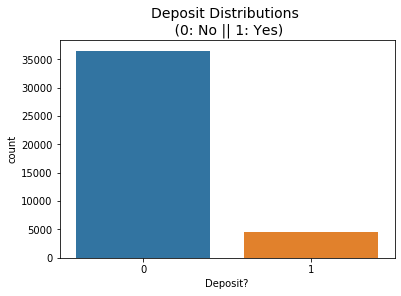

In [20]:
df = train
sns.countplot('Deposit?', data=df)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)
print(df.head)

This dataset is highly imbalanced which willl affect the results, so steps such as undersampling or oversampling, will need to taken to help fix the models. 

### Pre-Processing
Before applying machine learning algorithms, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:

-Label Encoding or One-Hot Encoding

For the given dataset, we are going to label encode the categorical columns.



In [21]:
bank_scale=df.copy()

# remove 'pdays' and 'default' columns
bank_scale= bank_scale.drop(['default'], axis=1)

#bank_scale['Deposit?'].replace(('yes', 'no'), (1, 0), inplace=True)

# standardization for just numerical variables 
categorical_cols= ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','Deposit?']
feature_scale=[feature for feature in bank_scale.columns if feature not in categorical_cols]

scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [22]:
scaled_data = pd.concat([bank_scale[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)

categorical_cols1= ['job','marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
scaled_data= pd.get_dummies(scaled_data, columns = categorical_cols1, drop_first=True)
scaled_data.head()

,Deposit?,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,1.388231,-0.565922,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1.388231,-0.565922,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0.029072,-0.565922,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0.029072,-0.565922,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,1.388231,-0.565922,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,...,1,0,0,0,1,0,0,0,1,0


In [23]:
X = scaled_data.iloc[:,1:]
Y = scaled_data.iloc[:,-0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'Deposit Distributions \n (0: No || 1: Yes)')

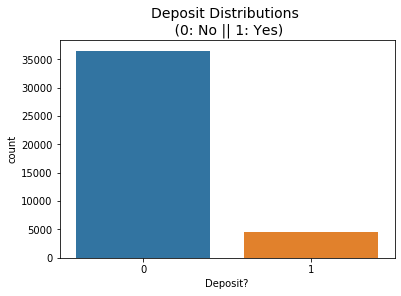

In [24]:
sns.countplot('Deposit?', data=scaled_data)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)

In [25]:
print(scaled_data.shape)
scaled_data.isnull().sum().sort_values(ascending = False)


(41188, 49)


poutcome_success                 0
education_basic.9y               0
marital_unknown                  0
marital_single                   0
marital_married                  0
job_unknown                      0
job_unemployed                   0
job_technician                   0
job_student                      0
job_services                     0
job_self-employed                0
job_retired                      0
job_management                   0
job_housemaid                    0
job_entrepreneur                 0
job_blue-collar                  0
nr.employed                      0
euribor3m                        0
cons.conf.idx                    0
cons.price.idx                   0
emp.var.rate                     0
campaign                         0
age                              0
education_basic.6y               0
education_high.school            0
poutcome_nonexistent             0
education_illiterate             0
day_of_week_wed                  0
day_of_week_tue     

## Classification Modeling

#### Logistic Regression

C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.67      0.22      0.33      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Confusion matrix:
 [[10817   151]
 [ 1081   308]]


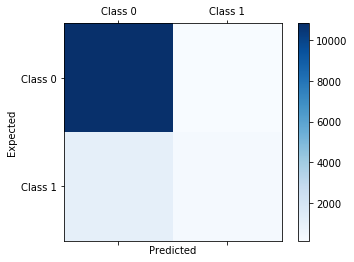

In [26]:
#Initializing and fitting the logistic regression model
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

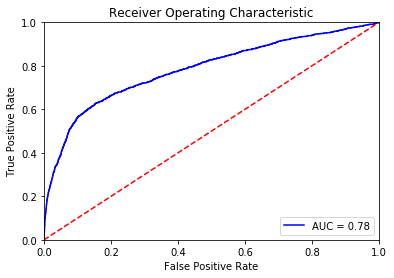

In [27]:
#Plotting ROC Curve for logistic Regression
import sklearn.metrics as metrics
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random Forest Model 

In [28]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
warnings.filterwarnings("ignore")
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train,y_train)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameter for Random Forest {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23} 0.789154147238526


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.67      0.22      0.33      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Confusion matrix:
 [[10743   225]
 [ 1037   352]]


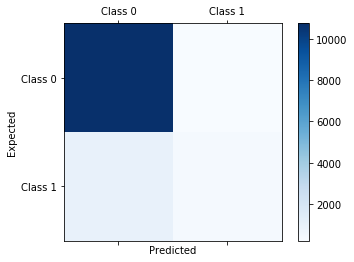

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=42)
rfc.fit(X_train, y_train)

rfc_predict_test = rfc.predict(X_test)

print(classification_report(y_test, y_pred))


conf_mat = confusion_matrix(y_true=y_test, y_pred=rfc_predict_test)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


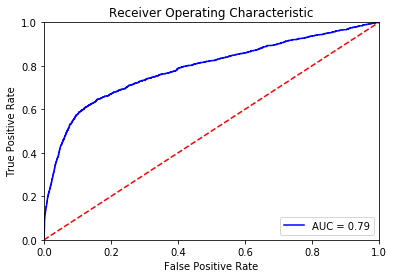

In [29]:
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train,y_train)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\tree\_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_spli

Best Parameter for Tree {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.900385094987451


              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.65      0.25      0.36      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.65     12357
weighted avg       0.88      0.90      0.88     12357

Confusion matrix:
 [[10780   188]
 [ 1039   350]]


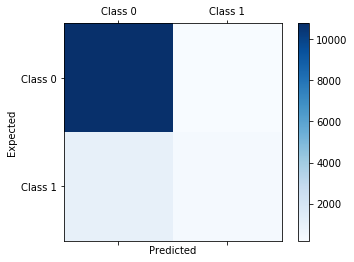

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = 4, min_samples_split = 2)
dtree.fit(X_train, y_train)
dtree_pred_test = dtree.predict(X_test)

print(classification_report(y_test, dtree_pred_test))

conf_mat = confusion_matrix(y_test, dtree_pred_test)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

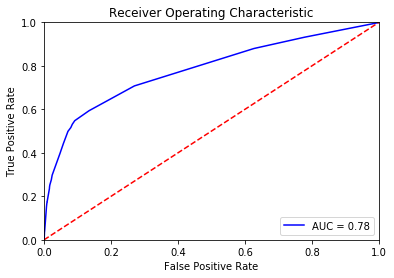

In [31]:
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

For all these models, it seems like they perform well for classifying the negative class given the high precision and recall scores, but not for classying the positive class. They all result in more false positives than true positives. That should be expected since there are significantly imbalanced distribution of the classes, but the results may improve if we rerun the models after using the oversampling method known as SMOTE.                                                                                                                          

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test,pred_knn))
confusion_matrix(y_test,pred_knn)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.51      0.26      0.34      1389

    accuracy                           0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



array([[10632,   336],
       [ 1034,   355]], dtype=int64)

### SMOTE Resampling to fix imbalance issues
Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for oversampling the minority class in the target respectively.

Note that SMOTE should always be applied only on the training data and not on the validation and test data.

The models will be rerun again to see if there were any improvements. 

In [32]:
sm = SMOTE(random_state = 12)
X_sm, y_sm = sm.fit_resample(X, Y)

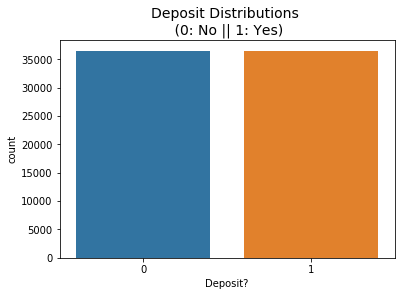

In [33]:
sns.countplot(y_sm)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize=14)

X_SMtrain,X_SMtest,y_SMtrain,y_SMtest=train_test_split(X_sm,y_sm,test_size=0.3,random_state=12)

#### KNN with SMOTE

In [ ]:
SM_knn=KNeighborsClassifier()
SM_knn.fit(X_SMtrain,y_SMtrain)
pred_SMknn=knn.predict(X_SMtest)
print(classification_report(y_SMtest,pred_SMknn))
confusion_matrix(y_SMtest,pred_SMknn)

Ran before but the results didn't change much compared to the model with imbalance adjustment. 

#### Decision Tree with SMOTE

In [ ]:
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_SMtrain,y_SMtrain)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

Had to restart the kernel a couple of times, and the GridSearch takes a while to run. I have used the parameters that resulted from it in the new models. 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85     10893
           1       0.91      0.74      0.82     11036

    accuracy                           0.83     21929
   macro avg       0.84      0.83      0.83     21929
weighted avg       0.84      0.83      0.83     21929

Confusion matrix:
 [[10082   811]
 [ 2866  8170]]


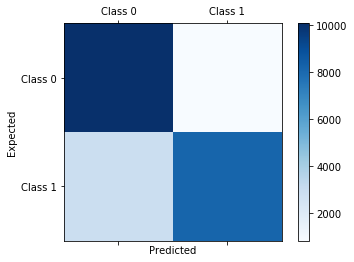

In [42]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 9, min_samples_leaf = 3, min_samples_split = 2)
dtree.fit(X_SMtrain, y_SMtrain)
dtree_pred_test = dtree.predict(X_SMtest)

print(classification_report(y_SMtest, dtree_pred_test))

conf_mat = confusion_matrix(y_SMtest, dtree_pred_test)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

With this model, there is a significant changes in its performance compared to before. While precision and recall have decreased for the negative class, this model did much better of classifying the true positives. The improvement can also be seen in the ROC curve below.                      

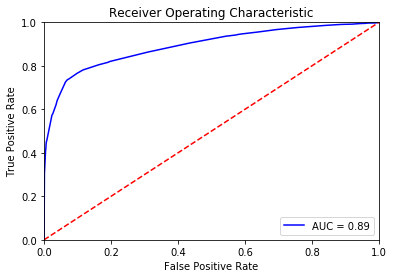

In [35]:
probs = dtree.predict_proba(X_SMtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_SMtest, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


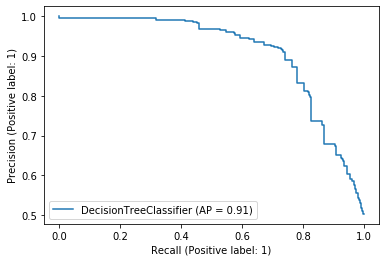

In [36]:
from sklearn.metrics import plot_precision_recall_curve
disp_dtree = plot_precision_recall_curve(dtree, X_SMtest, y_SMtest)


#### Random Forest Model with SMOTE

In [ ]:
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_SMtrain,y_SMtrain)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

              precision    recall  f1-score   support

           0       0.59      0.99      0.74     10893
           1       0.97      0.33      0.49     11036

    accuracy                           0.66     21929
   macro avg       0.78      0.66      0.61     21929
weighted avg       0.78      0.66      0.61     21929

Confusion matrix:
 [[10775   118]
 [ 7430  3606]]


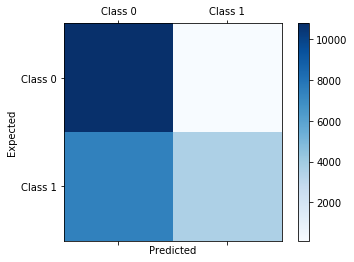

In [37]:
rfc_SM = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=45, min_samples_split=5, random_state=42)
rfc_SM.fit(X_SMtrain, y_SMtrain)

rfc_predict_test = rfc.predict(X_SMtest)

print(classification_report(y_SMtest, rfc_predict_test))


conf_mat = confusion_matrix(y_true=y_SMtest, y_pred=rfc_predict_test)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

While this did seem to improve the precision for the positive class compared to the other RFC model without SMOTE, it is only correctly identifying 33% of the class 1s, but 99% of the class 0s and doesn't do well in terms of precision for the negative class. That has resulted in a lower F1-score than the previous RFC model and the decision tree model. Therefore, we can conclude that the decision tree model outranks any of the models in terms of performance. 

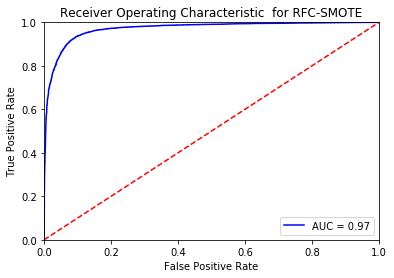

In [38]:
probs = rfc_SM.predict_proba(X_SMtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_SMtest, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic  for RFC-SMOTE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


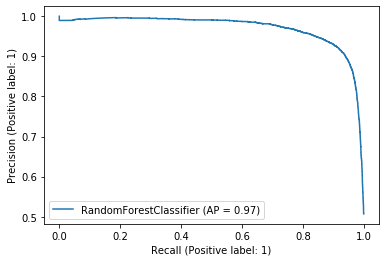

In [39]:
disp = plot_precision_recall_curve(rfc_SM, X_SMtest, y_SMtest)
 

#### Logistic Regression with SMOTE


C:\Users\Microsoft\anaconda2021\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.54      0.99      0.70     10893
           1       0.93      0.18      0.30     11036

    accuracy                           0.58     21929
   macro avg       0.74      0.58      0.50     21929
weighted avg       0.74      0.58      0.50     21929

Confusion matrix:
 [[10746   147]
 [ 9048  1988]]


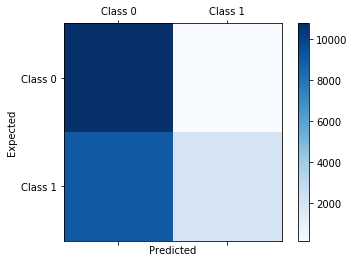

In [40]:
#Initializing and fitting the logistic regression model
lr_model_SM = LogisticRegression(max_iter=125)
lr_model_SM.fit(X_SMtrain,y_SMtrain)
y_pred = lr_model.predict(X_SMtest)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_SMtest, y_pred))


conf_mat = confusion_matrix(y_true=y_SMtest, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

This logistic regression model with SMOTE seems to have a worse performance compared to the one without any oversampling. While it has a lower number of false negatives, the false positives are significantly high meaning it's classifying customers who haven't subscribed to a term deposit as one who did. That would be very troubling, so this model shouldn't be our final choice. 

#### interpreting with SHAP

Given that machine learning models are commonly getting used to solving many problems nowadays, it has become quite important to understand the performance of these models.A deep understanding of our ML models can help us decide the reliability of our ML models and whether it fit to be put into production. The classic ML metrics like accuracy, mean squared error, r2 score, etc does not give detailed insight into the performance of the model since we can have machine learning model which gives more than 90% accuracy for classification task but fails to recognize some classes properly due to imbalance data or model is actually detecting features which do not make sense to be used to predict particular class. One of the many  python libraries available to debug model to better understand the model and its perfromance on any sample of the data is SHAP.
          
The SHAP stands for SHapley Additive exPlanations and uses the approach of game theory to explain model predictions. It starts with some base value for prediction based on prior knowledge and then tries features of data one by one to understand the impact of the introduction of that feature on our base value to make the final prediction. It even takes into account orders of feature introduction as well as the interaction between features helping us better understand model performance. 

In [ ]:
!pip install shap

In [43]:
import shap

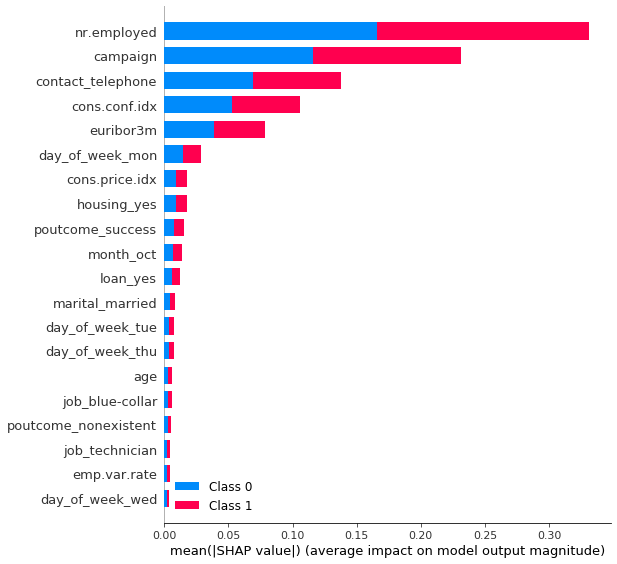

In [44]:
explainer = shap.TreeExplainer(dtree)
#shap_values = shap.TreeExplainer(dtree).shap_values(X_SMtrain)
#shap.summary_plot(explainer, X_SMtrain, plot_type="bar")
#shap_values = explainer.shap_values(data_for_prediction)
expl_dtree = shap.TreeExplainer(dtree)
shap_dtree = expl_dtree.shap_values(X_SMtrain)
shap.summary_plot(shap_dtree, X_SMtrain, plot_type="bar")


Since we concluded on using the decision tree model with SMOTE, it would be useful to get a sense of feature importances using SHAP. The result it produced indicated the top five most important features are nr.employed, campaign and contact_telephone, cons.conf.idx and euribor3m. Three of those are social and economic context attributes, which seems to indicate that it might be difficult to increase future term subscriptions given those factors are outside the bank's control.                                                                         